**Question: 1**

The total multiplications needed to perform a matrix multiplication between a (n,k) and (k,m) matrix would be **nmk**. Let us take two arrays, A(n,k) and B(k,m), and their multiplication would result in a new matrix C(n,m). We know that $$C_{ij} = \sum_{r=1}^{k} A_{ir} \cdot B_{rj}$$
which involves a total of k multiplication. C has a total of nm elements, so the overall multiplications required would be **nmk**.

We can also see from the above that for calculating one element of C, a total of **k-1** additions are made. Hence, a total of **nm(k-1)** additions will be made.


multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix

**Question 2:**

In [25]:
import time
import numpy as np

x = np.array([[1, 8, 3], [4, 9, 2], [2, 7, 8]])
y = np.array([[3, 5, 8], [2, 4, 1], [7, 3, 9]])
z1 = np.zeros([3, 3])
t1 = time.time()
for i in range(len(x)):
    for j in range(len(y[0])):
        for k in range(len(y)):
            z1[i][j] += x[i][k] * y[k][j]
t2 = time.time()
z2 = np.dot(x, y)
t3 = time.time()

print("Matrix multiplication using 1st method:")
print(z1)
print("Time taken using loop: {:.6f} seconds".format(t2 - t1))

print("\nMatrix multiplication using 2nd method (NumPy):")
print(z2)
print("Time taken using NumPy: {:.6f} seconds".format(t3 - t2))


Matrix multiplication using 1st method:
[[40. 46. 43.]
 [44. 62. 59.]
 [76. 62. 95.]]
Time taken using loop: 0.000813 seconds

Matrix multiplication using 2nd method (NumPy):
[[40 46 43]
 [44 62 59]
 [76 62 95]]
Time taken using NumPy: 0.000419 seconds


We can observe from the above result that the second method, which uses numpy to calculate the matrix multiplication, is faster because np.dot and many other functions of NumPy are written in optimized C code, making it a lot faster than the first method, which involves Python loops which are comparatively much slower. NumPy also uses vectorization, where computations can be performed on entire arrays simultaneously rather than iterating through each element individually.

**Question: 3**

Using the method given in the question it would require n/2 passes in total. Each pass takes O(n) time.

The total time complexity would be O(n^2/2).

In [198]:
import time
import numpy as np

arr = np.random.rand(5000)

In [199]:
# Using the method given in question (custom)

size = len(arr)
t1 = time.time()
for i in range((len(arr) // 2) + 1):
    max_id = 0
    for j in range(size):
        if arr[j] > arr[max_id]:
            max_id = j
    arr[max_id], arr[size - 1] = arr[size - 1], arr[max_id]
    size -= 1
median_custom = arr[size]
t2 = time.time()
time_taken_custom = t2 - t1

print("Median:", round(median_custom,3))
print("Time Taken (using custom method) {:.6f} seconds:".format(time_taken_custom))

Median: 0.498
Time Taken (using custom method) 3.409765 seconds:


In [200]:
# Using sort (better method than above)

arr_copy = arr.copy()
t3 = time.time()
arr_copy.sort()
size = len(arr)
mid = size // 2

if size % 2==0:
  median_sort = arr_copy[mid]

else:
  median_sort = (arr_copy[mid-1] + arr_copy[mid])/2

t4 = time.time()

time_taken_sort = t4 - t3
print("Median:", round(median_sort,3))
print("Time Taken (using sort) {:.6f} seconds:".format(time_taken_sort))




Median: 0.499
Time Taken (using sort) 0.001919 seconds:


In [201]:
# Using NumPy

t5 = time.time()
median_np = np.median(arr)
t6 = time.time()

time_taken_np = t6 - t5
print("Median:", round(median_np,3))
print("Time Taken (using np.median) {:.6f} seconds:".format(time_taken_np, 5))

Median: 0.498
Time Taken (using np.median) 0.001547 seconds:


We can see from above that the fastest method is the one where np.median is used.

**Question: 4**

The gradient of the function $x^3y + y^3\sin(x)$
with respect to x and y is the partial derivate of the function with respect to each variable.

Gradient/ Partial derivative of the function with respect to x is:
$3x^2y + y^3\cos(x)$

Gradient/ Partial derivative of the function with respect to y is:
$x^3 + 3y^2\sin(x)$

**Question: 5**

In [3]:
import jax
import jax.numpy as jnp

def function(x, y):
    return (x**3) * y + (y**3) * (jnp.sin(x))

grad_jax = jax.grad(function, argnums=(0, 1))

x_value = 1.0
y_value = 2.0

gradient_jax = grad_jax(x_value, y_value)
print("Numerical Gradient using JAX:", gradient_jax)


Numerical Gradient using JAX: (Array(10.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))


**Question: 6**

In [65]:
import sympy as sp

x, y = sp.symbols('x y')
function = x**3 * y + y**3 * sp.sin(x)
grad_sympy_symbolic = [sp.diff(function , var) for var in (x, y)]

print("Symbolic Gradient using SymPy:", grad_sympy_symbolic, "\n")

grad_at_values = [grad.subs({x: 1, y: 2}) for grad in grad_sympy_symbolic]
grad_sympy_numeric = [val.evalf() for val in grad_at_values]

print("Numeric Gradient at x=1, y=2:", grad_sympy_numeric)

Symbolic Gradient using SymPy: [3*x**2*y + y**3*cos(x), x**3 + 3*y**2*sin(x)] 

Numeric Gradient at x=1, y=2: [10.3224184469451, 11.0976518176948]


By comparing the numeric values obtained in question 5 and question 6 we can confirm that the gradient evaluated using JAX matches and our analytic soltution calculated using SymPy is the same.

**Question: 7**

In [67]:
student_info = {
    2022:{
        "Branch 1":{
            "Roll Number":1,
            "Name":"N",
            "Marks":{
                "Maths" : 100,
                "English" : 70
            }
        },
        "Branch 2":{

        }
    },
    2023:{
        "Branch 1":{

        },
        "Branch 2":{

        }
    },
    2024:{
        "Branch 1":{

        },
        "Branch 2":{

        }
    },
    2025:{
        "Branch 1":{

        },
        "Branch 2":{

        }
    }
}

print(student_info)

{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


**Question: 8**

In [120]:
class Student_Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __str__(self):
      y_str = '\n'.join(str(year) for year in self.years)
      return f"Student Database\n{y_str}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branches(self, branch):
        self.branches.append(branch)

    def __str__(self):
      br_str = '\n'.join(f"  {branch}" for branch in self.branches)
      return f"{self.year}\n{br_str}"

class Branch:
    def __init__(self, branch):
        self.branch = branch
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __str__(self):
        stu_str = '\n'.join(f"    {student}" for student in self.students)
        return f"{self.branch}\n{stu_str}"

class Student:
    def __init__(self, rollnumber, name):
        self.rollnumber = rollnumber
        self.name = name
        self.marks = []

    def add_marks(self, subject, subject_mark):
        mark = Mark(subject, subject_mark)
        self.marks.append(mark)

    def __str__(self):
      mark_str = ', '.join(f"{mark}" for mark in self.marks)
      formatted_mark = '\n'.join(f"        {sub}" for sub in mark_str.split('\n'))
      return f"Roll Number: {self.rollnumber}, Name: {self.name}, Marks: \n{formatted_mark}"

class Mark:
    def __init__(self, subject, subject_mark):
        self.subject = subject
        self.subject_mark = subject_mark

    def __str__(self):
      return f"{self.subject}: {self.subject_mark}"



student_db = Student_Database()

# First the years.
y2022 = Year(2022)
y2023 = Year(2023)
y2024 = Year(2024)
y2025 = Year(2025)

# Creating instances for branch and student
br_1_y2022 = Branch("Branch 1")
student_1 = Student(1, "N")

# Adding marks
student_1.add_marks("Maths", 100)
student_1.add_marks("English", 70)

# Adding student in branch
br_1_y2022.add_student(student_1)

# Adding branch in year
y2022.add_branches(br_1_y2022)

br_2_y2022 = Branch("Branch 2")
y2022.add_branches(br_2_y2022)

# Similarly for all the other years
br_1_y2023 = Branch("Branch 1")
br_2_y2023 = Branch("Branch 2")
y2023.add_branches(br_1_y2023)
y2023.add_branches(br_2_y2023)

br_1_y2024 = Branch("Branch 1")
br_2_y2024 = Branch("Branch 2")
y2024.add_branches(br_1_y2024)
y2024.add_branches(br_2_y2024)

br_1_y2025 = Branch("Branch 1")
br_2_y2025 = Branch("Branch 2")
y2025.add_branches(br_1_y2025)
y2025.add_branches(br_2_y2025)

# Adding years
student_db.add_year(y2022)
student_db.add_year(y2023)
student_db.add_year(y2024)
student_db.add_year(y2025)

print(student_db)

Student Database
2022
  Branch 1
    Roll Number: 1, Name: N, Marks: 
        Maths: 100, English: 70
  Branch 2

2023
  Branch 1

  Branch 2

2024
  Branch 1

  Branch 2

2025
  Branch 1

  Branch 2



**Question: 9**

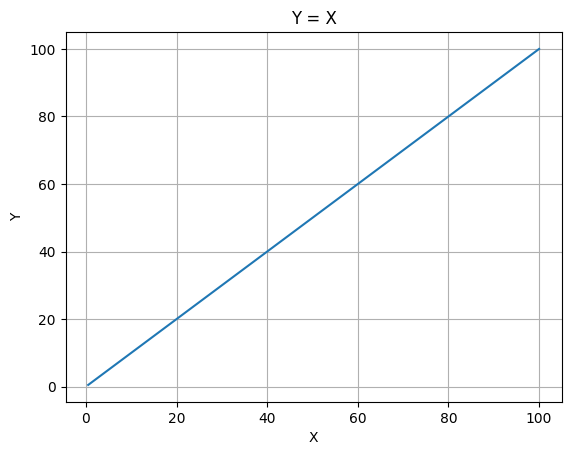

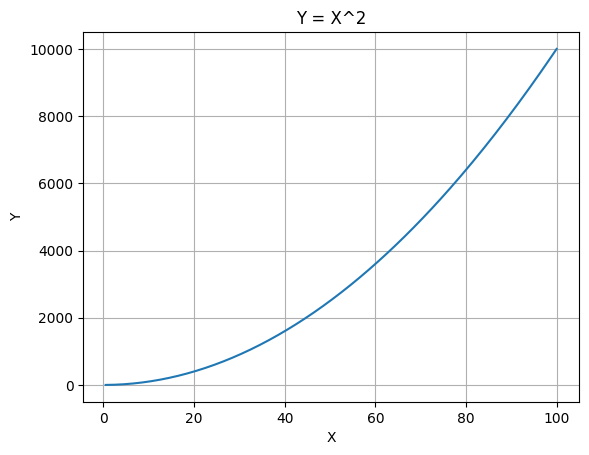

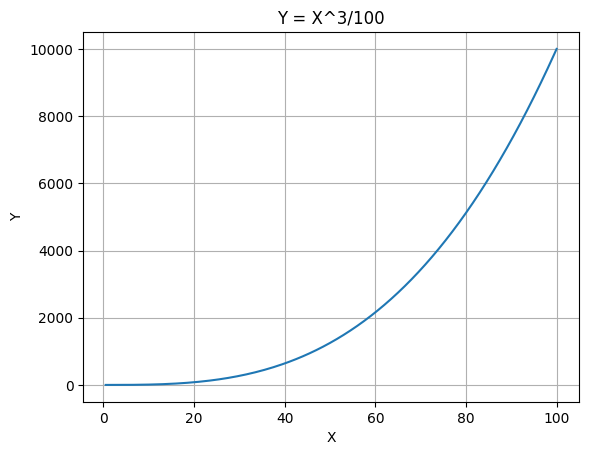

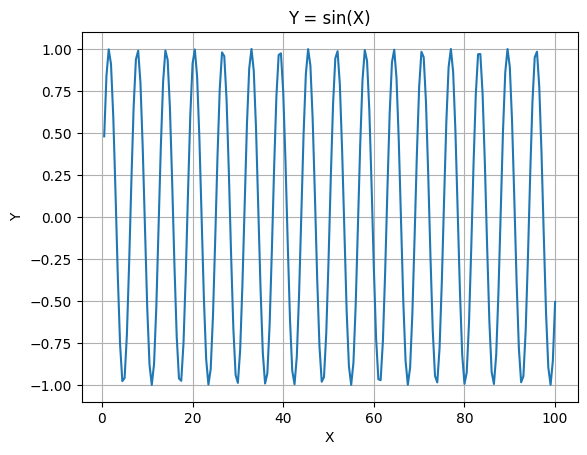

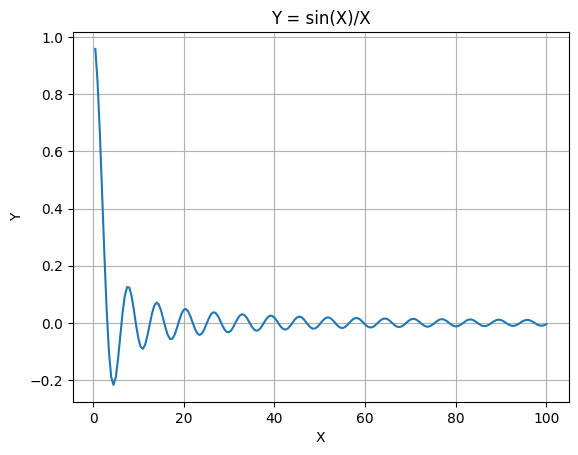

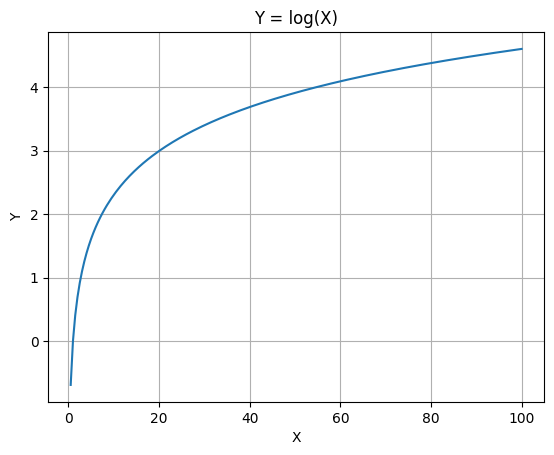

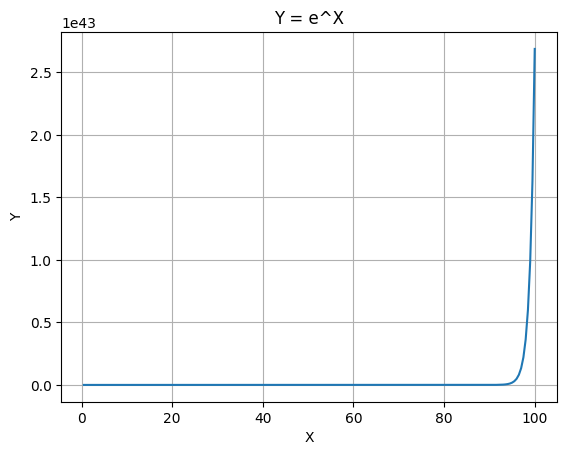

In [121]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5,100.5,0.5)
y = [x, x**2, x**3/100, np.sin(x), np.sin(x)/x, np.log(x), np.exp(x)]
y_labels = ["Y = X", "Y = X^2", "Y = X^3/100", "Y = sin(X)", "Y = sin(X)/X", "Y = log(X)", "Y = e^X"]

for i in range(len(y)):
  plt.figure(i)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(y_labels[i])
  plt.grid()
  plt.plot(x,y[i])
  plt.show()

**Question: 10**

In [141]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
column_names = ["a" , "b" , "c" , "d" , "e"]
df = pd.DataFrame(matrix , columns = column_names)
print(df)

highest_std = df.std().idxmax()
print(f"\nColumn with the highest standard deviation: {highest_std}")

lowest_mean = df.mean(axis=1).idxmin()
print(f"Row with the lowest mean: {lowest_mean}")

           a         b         c         d         e
0   1.903993  1.624875  1.424407  1.619782  1.674240
1   1.070318  1.541405  1.179073  1.737236  1.780059
2   1.715594  1.383349  1.191551  1.738117  1.221997
3   1.163018  1.748870  1.840247  1.900792  1.583582
4   1.642405  1.802273  1.397052  1.322779  1.859941
5   1.348582  1.396104  1.568161  1.917769  1.782247
6   1.043698  1.034541  1.166131  1.084539  1.048190
7   1.582276  1.997762  1.920987  1.036151  1.559909
8   1.879264  1.119319  1.383158  1.010839  1.327217
9   1.774233  1.434234  1.230966  1.093772  1.349107
10  1.886789  1.096668  1.319148  1.680224  1.401804
11  1.273708  1.155996  1.483981  1.797257  1.023696
12  1.039880  1.179125  1.353734  1.715870  1.369933
13  1.087902  1.532465  1.864048  1.845339  1.454144
14  1.491789  1.947893  1.552775  1.837539  1.982313
15  1.404894  1.705305  1.234456  1.751489  1.892812
16  1.658946  1.168653  1.905802  1.484565  1.064695
17  1.729569  1.345359  1.449438  1.356241  1.

**Question: 11**

In [142]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]

df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
print(df)
lt8_count = (df["g"] == "LT8").sum()
print("\nNumber of rows where the value in column g is LT8:", lt8_count)

std_g_lt8 = df.loc[df["g"] == "LT8", "f"].std()
std_g_gt8 = df.loc[df["g"] == "GT8", "f"].std()

print("Standard deviation of column f for the rows where the value in the column g is LT8:", std_g_lt8)
print("Standard deviation of column f for the rows where the value in the column g is GT8:", std_g_gt8)

           a         b         c         d         e         f    g
0   1.903993  1.624875  1.424407  1.619782  1.674240  8.247298  GT8
1   1.070318  1.541405  1.179073  1.737236  1.780059  7.308091  LT8
2   1.715594  1.383349  1.191551  1.738117  1.221997  7.250607  LT8
3   1.163018  1.748870  1.840247  1.900792  1.583582  8.236510  GT8
4   1.642405  1.802273  1.397052  1.322779  1.859941  8.024450  GT8
5   1.348582  1.396104  1.568161  1.917769  1.782247  8.012863  GT8
6   1.043698  1.034541  1.166131  1.084539  1.048190  5.377098  LT8
7   1.582276  1.997762  1.920987  1.036151  1.559909  8.097085  GT8
8   1.879264  1.119319  1.383158  1.010839  1.327217  6.719797  LT8
9   1.774233  1.434234  1.230966  1.093772  1.349107  6.882311  LT8
10  1.886789  1.096668  1.319148  1.680224  1.401804  7.384633  LT8
11  1.273708  1.155996  1.483981  1.797257  1.023696  6.734638  LT8
12  1.039880  1.179125  1.353734  1.715870  1.369933  6.658542  LT8
13  1.087902  1.532465  1.864048  1.845339  1.45

**Question: 12**

Broadcasting is a feature in NumPy that allows arrays of different shapes and sizes to be combined in arithmetic operations.

In [148]:
import numpy as np

x = np.array([[4, 2, 3], [10, 7, 9]])

y = np.array([17, 3, 8])

# Adding 10 in all elements of array x
res1 = x + 10

# Multiplying all elements of array x by 10
res2 = x * 10

# Adding arrays x and y of different shapes
res3 = x + y

print("\nExample 1")
print(res1)

print("\nExample 2")
print(res2)

print("\nExample 3")
print(res3)



Example 1
[[14 12 13]
 [20 17 19]]

Example 2
[[ 40  20  30]
 [100  70  90]]

Example 3
[[21  5 11]
 [27 10 17]]


**Question: 13**

In [50]:
import numpy as np

x = np.array([[10, 8, 3], [4, 9, 2], [2, 0, 8]])

def id_min(arr):
  min = arr[0][0]
  index = (0,0)

  for i in range(len(arr)):
    for j in range(len(arr[0])):
      if arr[i][j] < min:
        min = arr[i][j]
        index = (i,j)
  return index

id_using_function = id_min(x)

id_using_np = np.unravel_index(np.argmin(x), x.shape)
print("Index of the minimum element using custom function is:", id_using_function,"\n")
print("Index of the minimum element using np.argmin is:", id_using_np)

Index of the minimum element using custom function is: (2, 1) 

Index of the minimum element using np.argmin is: (2, 1)
